In [15]:
import numpy as np 
import glob
import os
import matplotlib.pyplot as plt
import string
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

In [16]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [17]:
# For Implementing KNN
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# For ROC Curve
from sklearn.metrics import roc_curve

In [19]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
Dataset = pd.read_csv('diabetes.csv')

In [22]:
Dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
Dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
X = Dataset.drop('Outcome',axis=1).values       # Input
y = Dataset['Outcome'].values                   # Target

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)  # Splitting by 70:30 ratio


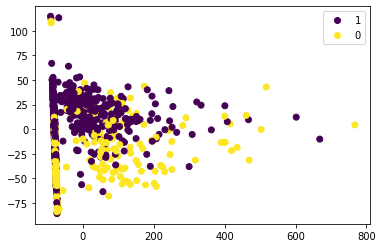

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(Dataset['Outcome']))
plt.show()

In [13]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [14]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

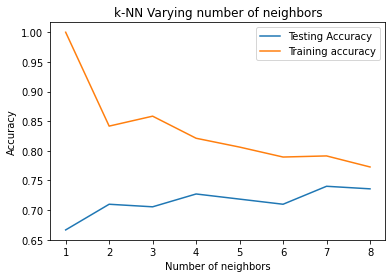

In [15]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [16]:
#Setup a knn classifier with k neighbors
Model = KNeighborsClassifier(n_neighbors=7)

In [17]:
#Fit the model
Model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [18]:
Model.score(X_test,y_test) # Accuracy of the model

0.7402597402597403

In [19]:
y_pred = Model.predict(X_test) # Performing predictions

In [21]:
y_pred_proba = Model.predict_proba(X_test)[:,1]

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

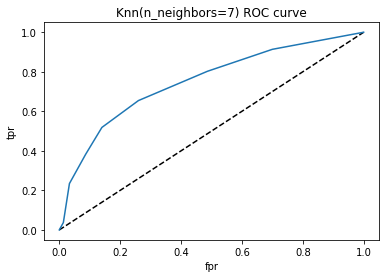

In [24]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [25]:
roc_auc_score(y_test,y_pred_proba)

0.7490123456790124

In [26]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [27]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [28]:
knn_cv.best_score_    # Best score of KNN model

0.7578558696205755

In [29]:
knn_cv.best_params_    # Best parameters for the Model

{'n_neighbors': 14}